In [ ]:
import pandas as pd

df = pd.read_csv('prompt_data.csv')


,prompt,response,response_id,quality_label,length,prompt_response_sim
0,What is the tallest mountain in the world?,The tallest mountain in the world is Mount Eve...,1,2,12,0.879011
1,What is the tallest mountain in the world?,Mount Everest is the tallest mountain.,2,1,6,0.876640
2,What is the tallest mountain in the world?,I don’t know.,3,0,3,0.074464
3,Explain the process of evaporation.,Evaporation is the process where water molecul...,4,2,14,0.797544
4,Explain the process of evaporation.,Water turns into vapor.,5,1,4,0.514446
...,...,...,...,...,...,...
307,Write a paragraph in favor of remote work.,Working from home is good.,2,1,5,0.356806
308,Write a paragraph in favor of remote work.,Remote work.,3,0,2,0.707858
309,Provide a synonym for the word 'beautiful' and...,A synonym for beautiful is 'gorgeous'. The sun...,1,2,12,0.751477
310,Provide a synonym for the word 'beautiful' and...,Beautiful means nice.,2,1,3,0.719960


In [ ]:
from collections import Counter

# Load the dataset
df = pd.read_csv('prompt_data.csv')

# Function to count repeated words in a response
def count_repeated_words(response):
    words = response.lower().split()
    word_counts = Counter(words)
    repeated = sum(count - 1 for word, count in word_counts.items() if count > 1)
    return repeated

# Add the new column 'repeated_words'
df['repeated_words'] = df['response'].apply(count_repeated_words)

# Save the updated dataset
df.to_csv('prompt_data_updated.csv', index=False)

# Display first 10 rows to verify
print(df[['prompt', 'response', 'length', 'prompt_response_sim', 'repeated_words']].head(10))

Mean of features by quality_label:
                  length  prompt_response_sim  repeated_words
quality_label                                                
0               1.913462             0.457310        0.009615
1               3.855769             0.644116        0.048077
2              11.721154             0.648577        0.538462


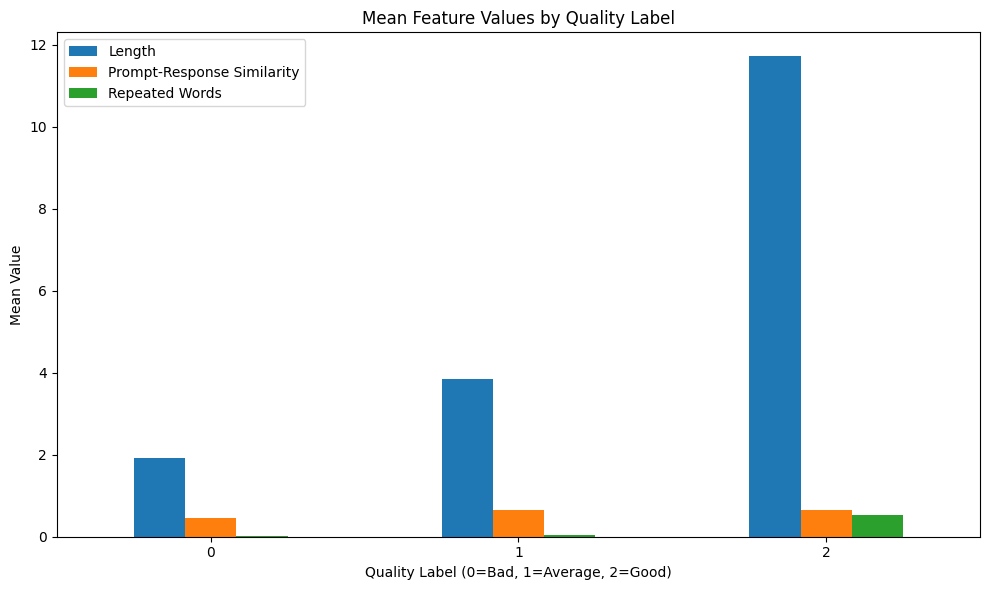

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset
df = pd.read_csv('prompt_data_updated.csv')

# Calculate mean of features for each quality_label
mean_features = df.groupby('quality_label')[['length', 'prompt_response_sim', 'repeated_words']].mean()
print("Mean of features by quality_label:")
print(mean_features)

# Plot bar chart for mean features
mean_features.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Feature Values by Quality Label')
plt.xlabel('Quality Label (0=Bad, 1=Average, 2=Good)')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(['Length', 'Prompt-Response Similarity', 'Repeated Words'])
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = df[['length', 'prompt_response_sim', 'repeated_words']]
y = df['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.88      0.83      0.86        18
           2       0.96      0.96      0.96        25

    accuracy                           0.90        63
   macro avg       0.90      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63



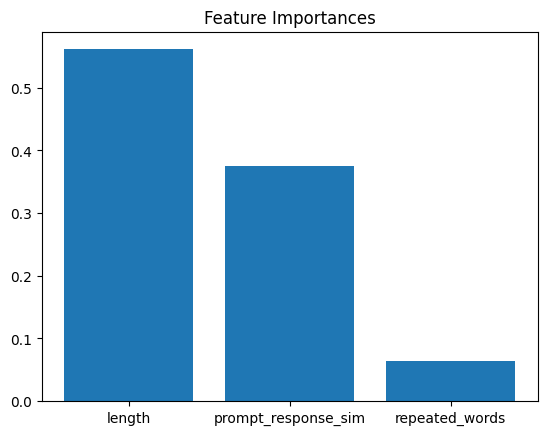

In [17]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
plt.bar(X.columns, feature_importances)
plt.title("Feature Importances")
plt.show()


<Axes: >

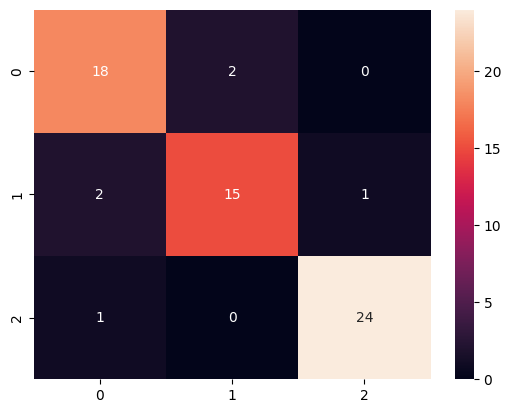

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [19]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# فرض بر اینکه y_test و y_pred آماده هستن
cm = confusion_matrix(y_test, y_pred)

# تبدیل به DataFrame برای دیدن راحت‌تر
labels = [0, 1, 2]  # لیبل‌های کیفیت: بد، متوسط، خوب
cm_df = pd.DataFrame(cm, index=[f'True {i}' for i in labels],
                        columns=[f'Pred {i}' for i in labels])

print(cm_df)


        Pred 0  Pred 1  Pred 2
True 0      18       2       0
True 1       2      15       1
True 2       1       0      24


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# فرض: df دیتا فریم نهایی با ویژگی‌ها و لیبل‌هاست

X = df[['length', 'prompt_response_sim', 'repeated_words']]
y = df['quality_label']

# تقسیم‌بندی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل SVM با کرنل RBF (غیرفقط خطی)
model = SVC(kernel='rbf', C=1, gamma='scale')  # kernel='linear' هم میشه تست کرد

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی و ارزیابی
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.79      0.83      0.81        18
           2       0.96      1.00      0.98        25

    accuracy                           0.89        63
   macro avg       0.88      0.88      0.88        63
weighted avg       0.89      0.89      0.89        63

Confusion Matrix:
[[16  4  0]
 [ 2 15  1]
 [ 0  0 25]]


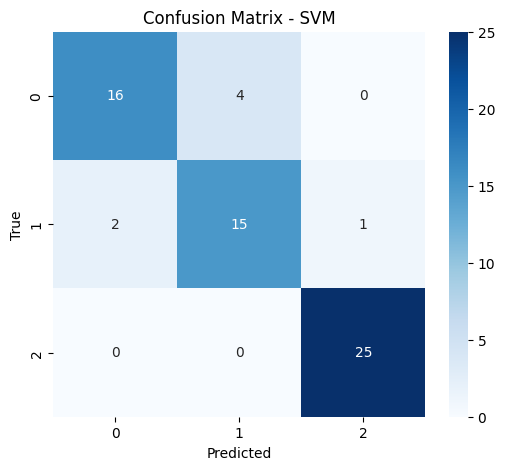

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ساخت کانفیوژن
cm = confusion_matrix(y_test, y_pred)
labels = [0, 1, 2]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# مدل رگرسیون
reg = LinearRegression()
reg.fit(X_train, y_train)

# پیش‌بینی
y_pred_reg = reg.predict(X_test)

# نتایج
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R^2 Score:", r2_score(y_test, y_pred_reg))


MSE: 0.23859061157980402
R^2 Score: 0.6630013746048959


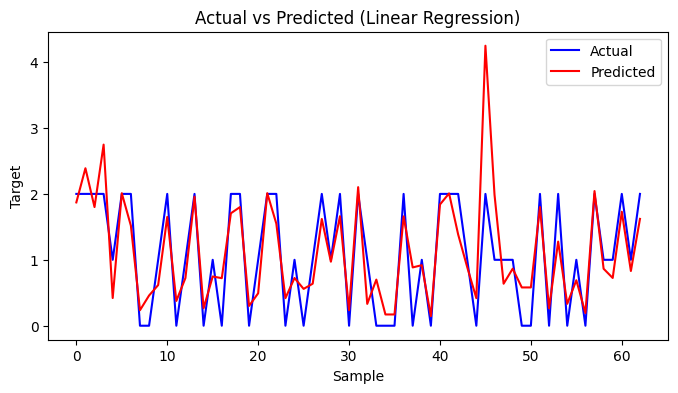

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات ساده نمودار
plt.figure(figsize=(8, 4))

# نمودار واقعی در برابر پیش‌بینی
sns.lineplot(x=range(len(y_test)), y=y_test, label="Actual", color='blue')
sns.lineplot(x=range(len(y_pred_reg)), y=y_pred_reg, label="Predicted", color='red')

plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Sample")
plt.ylabel("Target")
plt.legend()
plt.show()

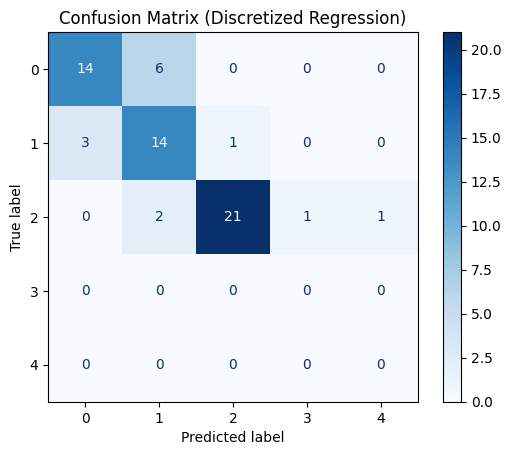

In [25]:
import numpy as np

# فرض: y_test و y_pred_reg اعداد اعشاری هستند
# می‌خوایم اونا رو گِرد کنیم و به دسته‌های گسسته تبدیل کنیم
y_test_discrete = np.round(y_test).astype(int)
y_pred_discrete = np.round(y_pred_reg).astype(int)

# حالا می‌تونی کانفیوژن ماتریس بزنی
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_discrete, y_pred_discrete)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Discretized Regression)")
plt.show()

<div style="direction: rtl; white-space: pre-wrap; line-height: 1.5;">



```markdown
[START_OF_REPORT]
# ارزیابی کیفیت پاسخ‌های مدل زبانی با استفاده از یادگیری ماشین

## 🎯 خلاصه پروژه
این پروژه به ارزیابی کیفیت پاسخ‌های یک مدل زبانی (LLM) با استفاده از یادگیری ماشین می‌پردازد.

## 📊 اطلاعات داده‌ها
- **تعداد پرامپت‌ها:** 104 عدد  
- **تعداد پاسخ به ازای هر پرامپت:** 3 (بد، متوسط، خوب)  
- **تعداد کل نمونه‌ها:** 312 عدد  
- **لیبل‌ها:** 0 = بد، 1 = متوسط، 2 = خوب  
- **ویژگی‌های استخراجی:**
  - `length`: طول پاسخ
  - `prompt_response_sim`: شباهت معنایی بین پرامپت و پاسخ
  - `repeated_words`: تعداد کلمات تکراری در پاسخ

## 🧪 مدل‌های آزمایش شده
| مدل              | دقت | F1-score (میانگین) | نوع مدل         |
|------------------|-----|--------------------|-----------------|
| Random Forest    | **90%** | **0.90**        | طبقه‌بندی       |
| SVM (RBF)        | 89%     | 0.88             | طبقه‌بندی       |
| Linear Regression| R² = 0.66 | —              | رگرسیون         |

## 📈 نتایج مهم
- **Random Forest** بهترین عملکرد رو داشت.
- `prompt_response_sim` مهم‌ترین ویژگی شناخته شد.
- رگرسیون خطی برای طبقه‌بندی مناسب نیست مگر با گسسته‌سازی.

## 📁 فایل‌ها
- `prompt_data_updated.csv`: داده‌های برچسب‌گذاری شده با ویژگی‌های استخراجی

## 🚀 گام‌های بعدی (اختیاری)
- افزودن ویژگی‌های بیشتر (مثل embedding با BERT، امتیاز دستوری)
- استفاده از مدل‌های عمیق‌تر برای دقت بیشتر
- ساخت یک اینترفیس کاربری با Streamlit برای ارزیابی آنلاین
[END_OF_REPORT]
```
</div>